In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [309]:
tebak = cv2.imread('dataset_3\\test_labeled\\bus\\20210526_10_32_31_000_3nuBXGXZvPdzmtnIK8qVYV7WDfG3_T_2448_3264_jpg.rf.c837b8b46aa480803ff7f26af70c4163.jpg')
plt.imshow(tebak)

In [90]:
TEST_IMAGE_PATH = 'test'

test_images = [{
    'image': cv2.imread(os.path.join(TEST_IMAGE_PATH, f)),
    'name': f.split('.')[0].split('_')[0],
} for f in os.listdir(TEST_IMAGE_PATH)]

fig, axes = plt.subplots(2, len(test_images)//2, figsize=(20, 12))
axes = axes.flatten()

for img, ax in zip(test_images, axes):
    ax.imshow(cv2.cvtColor(img['image'], cv2.COLOR_BGR2RGB))
    ax.set_title(img['name'])
    ax.axis('off')


In [328]:
# Walk recursively on dataset_3
import os
import cv2

DATASET_PATH = 'dataset_3'

dataset = []
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith('.jpg'):
            dataset.append(os.path.join(root, file))

print(f'Found {len(dataset)} images')

Found 0 images


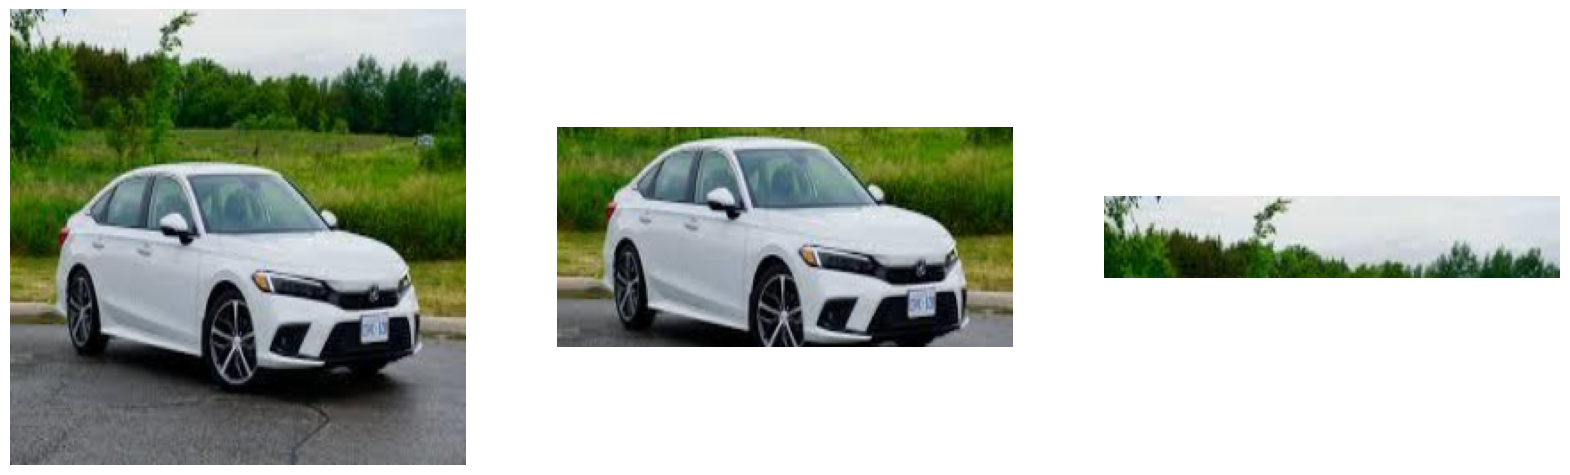

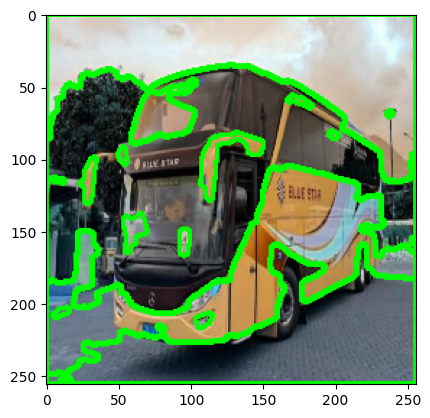

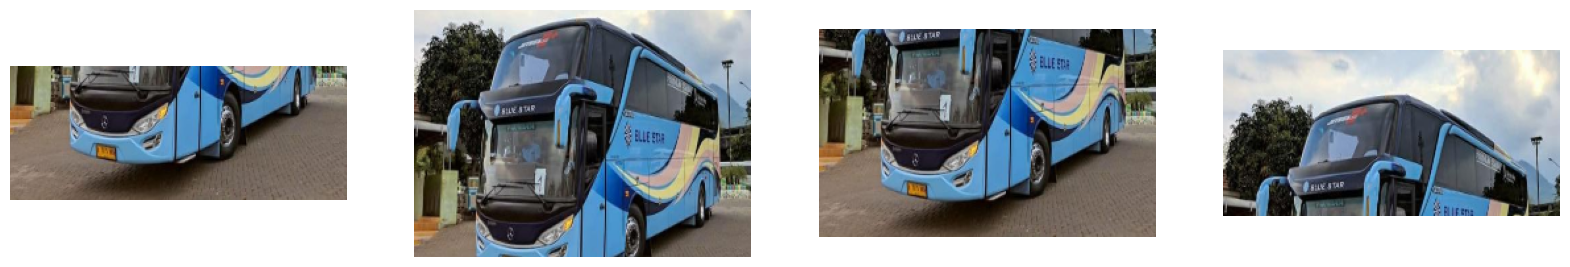

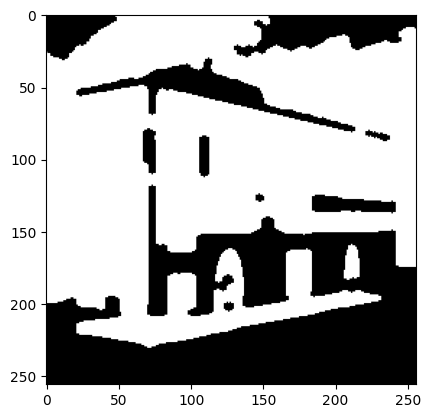

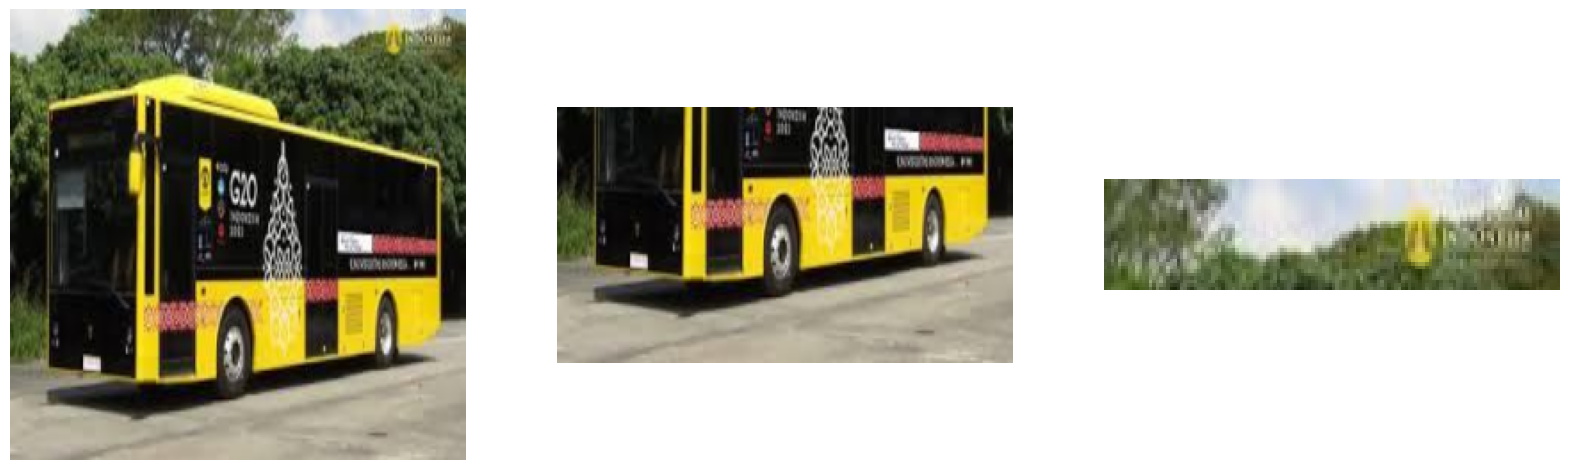

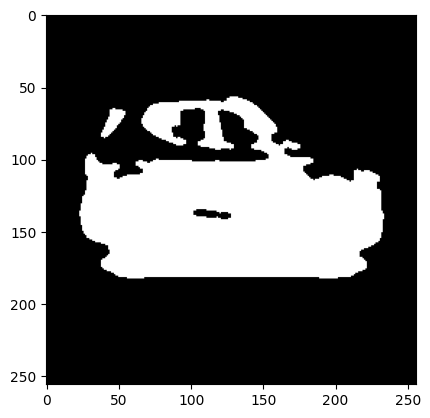

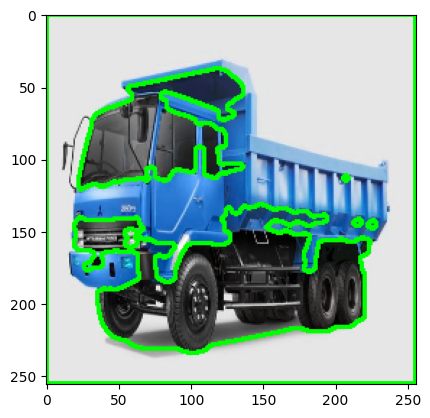

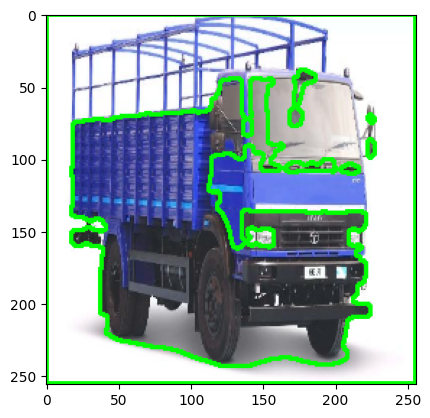

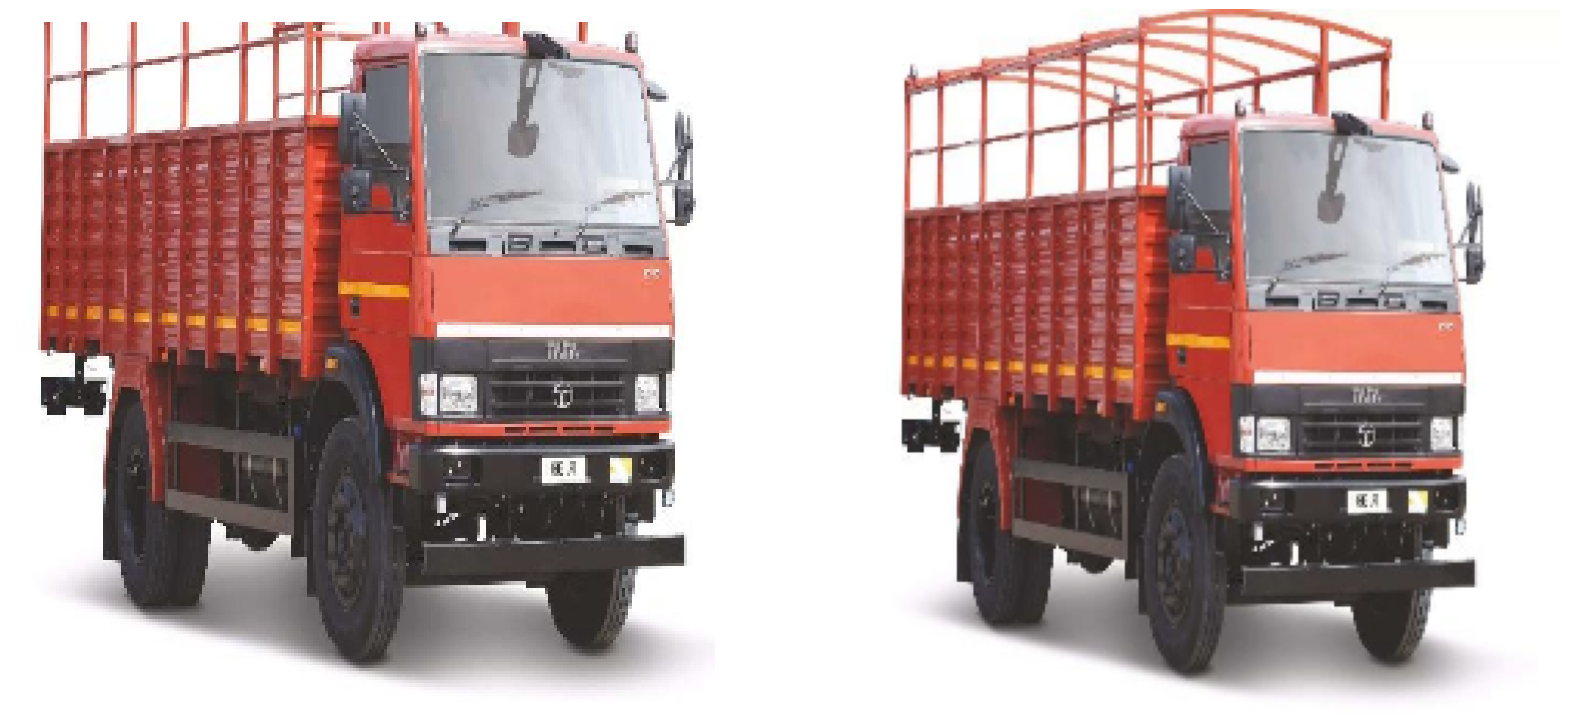

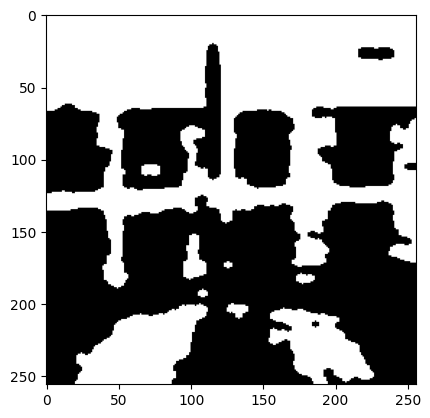

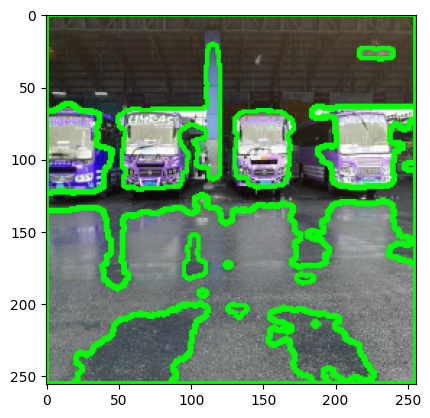

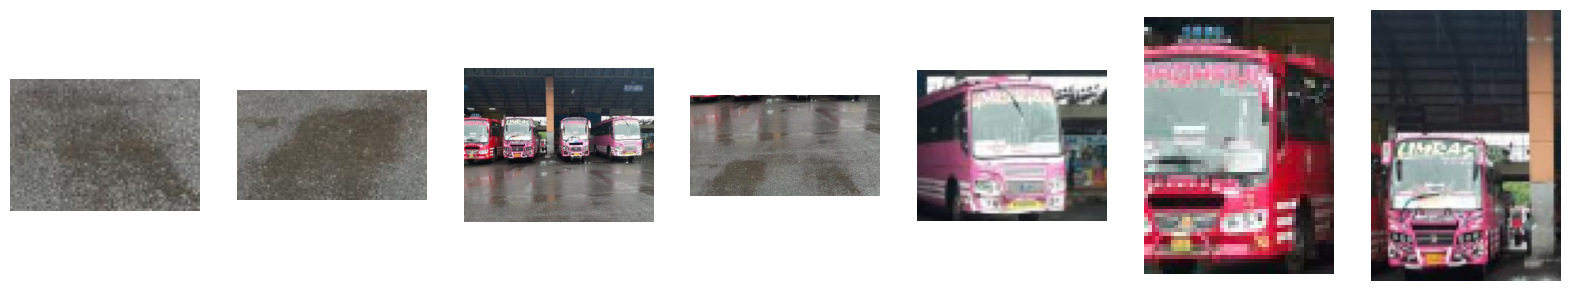

In [337]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_sub_images(image, padding=0.1):
    # Segment image
    image = image.copy()

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blur = cv2.GaussianBlur(hsv, (5, 5), 0)
    mask = cv2.threshold(blur[:, :, 2], 0, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

    # Find contours
    cnts, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnts_inv, _ = cv2.findContours(~opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnts = cnts + cnts_inv

    min_area = 2000
    cropped_images = []
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            x,y,w,h = cv2.boundingRect(c)
            x = max(0, x - int(padding * w))
            y = max(0, y - int(padding * h))
            w = min(image.shape[1], w + 2 * int(padding * w))
            h = min(image.shape[0], h + 2 * int(padding * h))
            ROI = image[y:y+h, x:x+w]
            cropped_images.append(ROI)

    return cropped_images, cnts

for i in range(0, 6):
    # image = tebak
    image = test_images[i]['image']
    # resize image to 256x256
    image = cv2.resize(image, (256, 256))
    cropped_images, cnts = get_sub_images(image, 0.05)
    
    fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 12))
    if len(cropped_images) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for img, ax in zip(cropped_images, axes):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

    plt.show()

image = tebak
# resize image to 256x256
image = cv2.resize(image, (256, 256))
cropped_images, cnts = get_sub_images(image, 0.05)

fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 12))
if len(cropped_images) == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for img, ax in zip(cropped_images, axes):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')

plt.show()



In [ ]:
def get_sub_images(image, padding=0.1):
    # Segment image
    image = image.copy()

    blur = cv2.GaussianBlur(image, (5,5), 0)
    
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]

    # Morph open to remove noise and invert image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    # opening = thresh
    invert = np.uint8((opening == 0))

    plt.imshow(opening, cmap='gray')
    plt.show()

    # Find contours and remove small noise
    cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    cnts_inv = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts_inv = cnts_inv[0] if len(cnts_inv) == 2 else cnts_inv[1]
    cnts = cnts + cnts_inv

    plt.imshow(cv2.drawContours(image.copy(), cnts, -1, (0, 255, 0), 2))
    plt.show()


    min_area = 2000
    cropped_images = []
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            x,y,w,h = cv2.boundingRect(c)
            x = max(0, x - int(padding * w))
            y = max(0, y - int(padding * h))
            w = min(image.shape[1], w + 2 * int(padding * w))
            h = min(image.shape[0], h + 2 * int(padding * h))
            ROI = image[y:y+h, x:x+w]
            cropped_images.append(ROI)

    return cropped_images, cnts
